# Autocorrelation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

## Part I - Discover the code

In [2]:
# Import filter (h(t))
h = Image.open('images/h_0001.jpg')
realsize=h.size
print(realsize)
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h,dtype=float)
h = h[:, :, 0] #RGB to Gray-scale
size_x = len(h[0])
size_y = len(h)
print(h.shape) #[Y,X]
print(size_x)
print(size_y)
print('h(t) imported and reduced correctly!')

(3280, 2464)
(820, 616)
(616, 820)
820
616
h(t) imported and reduced correctly!


In [3]:
# FLIP:
hf = np.flip(h, axis=None)
print("Flipped!")

Flipped!


(1231, 1639)


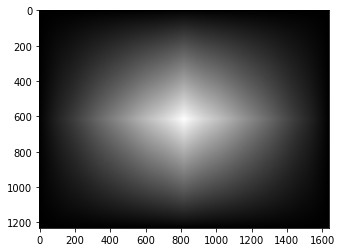

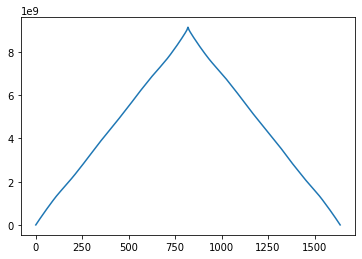

In [4]:
auto=signal.fftconvolve(h,hf,mode='full')

# Plotting
print(auto.shape)

plt.imshow(auto, cmap='gray')
plt.show()

plt.plot(auto[size_y-1,:])
plt.show()

[[9.04425385e+09 9.06427312e+09 9.08006180e+09 9.06458091e+09
  9.04469547e+09]
 [9.06874706e+09 9.09057488e+09 9.10732448e+09 9.09082367e+09
  9.06905473e+09]
 [9.08849149e+09 9.11128342e+09 9.12937603e+09 9.11128342e+09
  9.08849149e+09]
 [9.06905473e+09 9.09082367e+09 9.10732448e+09 9.09057488e+09
  9.06874706e+09]
 [9.04469547e+09 9.06458091e+09 9.08006180e+09 9.06427312e+09
  9.04425385e+09]]


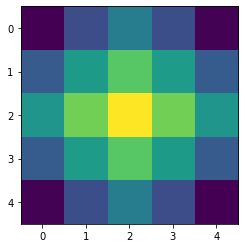

In [12]:
center_peak=auto[613:618,817:822] #Center at auto[615,819]
print(center_peak)
plt.imshow(center_peak)
plt.show()

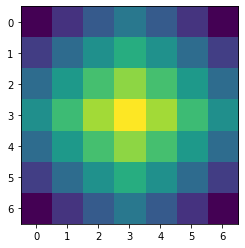

In [14]:
margin=3
plt.imshow(auto[615-margin:615+margin+1,819-margin:819+margin+1])
plt.show()

In [18]:
[auto_y,auto_x]=auto.shape
print(auto_x)
print(auto_y)

1639
1231


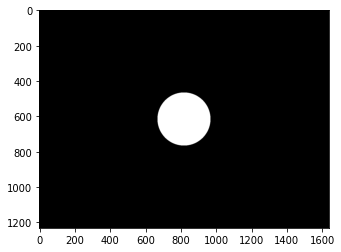

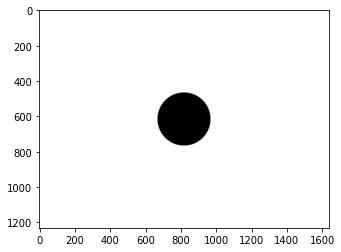

In [36]:
#Image with disk: x(t)
def areas_disk(radi,sx,sy):
    disk_in = np.zeros((sy, sx), dtype=float)
    disk_out = np.ones((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    disk_in[rr, cc] = 1
    disk_out[rr, cc] = 0
    return (disk_in, disk_out)

radius=150
[area_in, area_out] =areas_disk(radius,auto_x,auto_y)

plt.imshow(area_in, cmap='gray')
plt.show()

plt.imshow(area_out, cmap='gray')
plt.show()

# margin=radius
# plt.imshow(center_disk[615-margin:615+margin+1,819-margin:819+margin+1])
# plt.show()

In [37]:
values_in=area_in*auto
values_out=area_out*auto

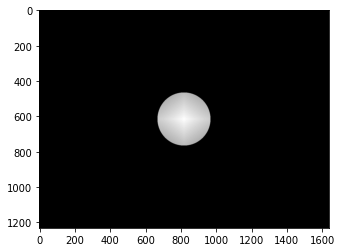

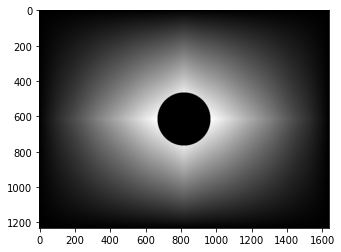

In [38]:
plt.imshow(values_in, cmap='gray')
plt.show()

plt.imshow(values_out, cmap='gray')
plt.show()

In [43]:
print(values_in)
average_in=np.average(values_in)
print(average_in)

average_out=np.average(values_out)
print(average_out)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
256482449.67904833
1990593353.9432833


In [69]:
average_in_nz = values_in[np.nonzero(values_in)].mean()
average_out_nz = values_out[np.nonzero(values_out)].mean()

In [71]:
ratio=average_in/average_out
ratio_nz=average_in_nz/average_out_nz

print(ratio)
print(ratio_nz)

0.12884723500707324
3.550174304107658


## Part II - Clean Code

First, we import an image

In [93]:
h = Image.open('images/h_0001.jpg')
realsize=h.size
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h,dtype=float)
h = h[:, :, 0] #RGB to Gray-scale
size_x = len(h[0])
size_y = len(h)

Then, we flip it

In [94]:
hf = np.flip(h, axis=None)

We compute the convolution to obtain the autocorrelation

(1231, 1639)


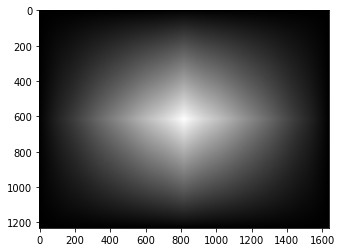

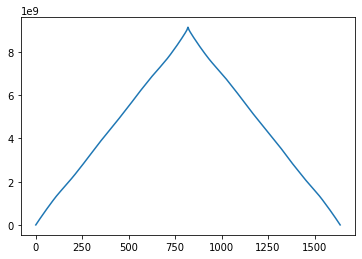

In [95]:
auto=signal.fftconvolve(h,hf,mode='full')

# Plotting
print(auto.shape)

plt.imshow(auto, cmap='gray')
plt.show()

plt.plot(auto[size_y-1,:])
plt.show()

Respect a centered circle, we compute the ratio of averages of the two parts

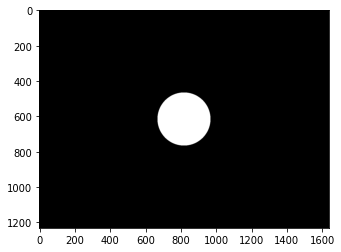

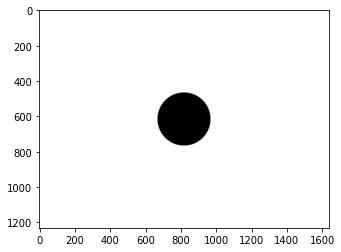

In [96]:
def areas_disk(radi,sx,sy):
    disk_in = np.zeros((sy, sx), dtype=float)
    disk_out = np.ones((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    disk_in[rr, cc] = 1
    disk_out[rr, cc] = 0
    return (disk_in, disk_out)

radius=150 #Here we can define the radius of the circle
[area_in, area_out] =areas_disk(radius,auto_x,auto_y)

plt.imshow(area_in, cmap='gray')
plt.show()

plt.imshow(area_out, cmap='gray')
plt.show()

## ALL VALUES

In [97]:
values_in=area_in*auto
values_out=area_out*auto

In [108]:
average_in=np.average(values_in)
average_out=np.average(values_out)

In [113]:
average_in2=values_in.mean()
average_out2=values_out.mean()

In [106]:
ratio=average_in/average_out
print(ratio)

0.12884723500707324


## NonZero VALUES

In [115]:
average_in_nz = values_in[np.nonzero(values_in)].mean()
average_out_nz = values_out[np.nonzero(values_out)].mean()

In [104]:
ratio_nz=average_in_nz/average_out_nz
print(ratio_nz)

3.550174304107658


As it has more sense (and also is faster), we will compute only the nonzero values